<a href="https://colab.research.google.com/github/eduardoGo/image-process-project/blob/main/project-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Image process project | Eduardo G. dos Santos

Paper: [An Effective Loss Function for Generating 3D Models from Single 2D Image without Rendering](https://arxiv.org/abs/2103.03390)

The authors provide some instructions of how get yours results on local computer. The main objective of this colab was get this results using Google Colab.

With code running on Google Colab, it is more easy propose changes on paper. Once we are able to reproduce the results, we will propose some improvements.

# Running the code

** First, check if your Runtime is set to GPU (Runtime > Change runtime type > Hardware acelerator > GPU). **

** Now, we have to make sure the current python version is 3.7 **

In [2]:
!sudo update-alternatives --config python3
!python3 --version

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.7   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
  2            /usr/bin/python3.7   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 0
Python 3.7.11


**Clone the paper repository to get the trained model and some image examples.**

In [3]:
!git clone https://github.com/NikolaZubic/2dimageto3dmodel.git


Cloning into '2dimageto3dmodel'...
remote: Enumerating objects: 402, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 402 (delta 7), reused 5 (delta 1), pack-reused 391
Receiving objects: 100% (402/402), 182.07 MiB | 23.86 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Checking out files: 100% (217/217), done.


**We have to install some packages that are avaliable on Anaconda, so we have to install it on Google colab.**

In [5]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-09-10 12:25:13--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-09-10 12:25:14--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 14.2M 4s
    50K .......... .......... .......... .......... ..........  0%

**Testing if everything is ok...**

In [6]:
!which conda
!conda --version

/usr/local/bin/conda
conda 4.5.4


**Now, we have to install the packages. Some packages require python 3.8 by default, so we have to make sure that the python 3.7 holds up.**

In [7]:
!conda install pytorch torchvision torchaudio cudatoolkit=11.0 python=3.7 -c pytorch

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

**We have to install a kaolin package manually inside the paper repository, using a specific commit version of the github.**

In [10]:
!git clone https://github.com/NVIDIAGameWorks/kaolin.git 2dimageto3dmodel/kaolin/
!cd 2dimageto3dmodel/kaolin/ && git checkout e7e513173bd4159ae45be6b3e156a3ad156a3eb9

Cloning into '2dimageto3dmodel/kaolin'...
remote: Enumerating objects: 2639, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 2639 (delta 174), reused 166 (delta 136), pack-reused 2368
Receiving objects: 100% (2639/2639), 66.72 MiB | 23.15 MiB/s, done.
Resolving deltas: 100% (1349/1349), done.
Note: checking out 'e7e513173bd4159ae45be6b3e156a3ad156a3eb9'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at e7e5131 Add a reformat note at the beginning for the README (#298)


**Checking if the python version is still 3.7**

In [11]:
!python --version

Python 3.7.11


**Installing the kaolin package**

In [12]:
!cd 2dimageto3dmodel/kaolin/ && python setup.py install

WARNING - Kaolin is tested with PyTorch >=1.2.0, <1.5.0 Found version 1.7.1 instead.
WARNING - Kaolin is tested with torchvision >=0.4.0, <0.6.0 Found version 0.8.2 instead.
Building nv-usd...
Adjusting /root/.profile
Adjusting /root/.bashrc
Creating packman packages repository at /root/packman-repo
Fetching python@3.6.8-linux-x86_64.tar.gz from S3 ...
Unpacking python
Fetching packman-common@6.1.3.zip from S3 ...
Unpacking ...
Processing project file '/root/packman-repo/packman-common/6.1.3/deps.packman.xml'
Package '7za' at version '16.02.4' is missing from local storage.
100.00% (speed 2.92 MiB/s)   
Total of 1.48 seconds
Unzipping: 7za@16.02.4.zip (9.87 MiB)
100.00% (speed 96.7 MiB/s)   
Total of 0.10 seconds
Package successfully installed to /root/packman-repo/chk/7za/16.02.4
Processing project file 'packman/target_deps.xml'
Package 'nv-usd-py36' at version '19.11.139.596f7aaf-linux-x86_64' is missing from local storage.
100.00% (speed 41.6 MiB/s)   
Total of 1.15 seconds

**Now, we have to install another required packages with pip.**

In [13]:
!pip install --no-dependencies nuscenes-devkit opencv-python-headless scikit-learn joblib pyquaternion cachetools

     |████████████████████████████████| 313 kB 3.9 MB/s 
     |████████████████████████████████| 37.1 MB 46 kB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 303 kB 43.4 MB/s 


In [14]:
!pip install packaging


     |████████████████████████████████| 40 kB 3.2 MB/s 


**Finally, we can predict some 3d images :)**

In [15]:
!cd 2dimageto3dmodel/code/ && python main.py --dataset cub --batch_size 16 --weights pretrained_weights_cub --save_results


CUB 200-2011 dataset with 5964 images is successfully loaded.


Export of batch with size '16' successfully done.



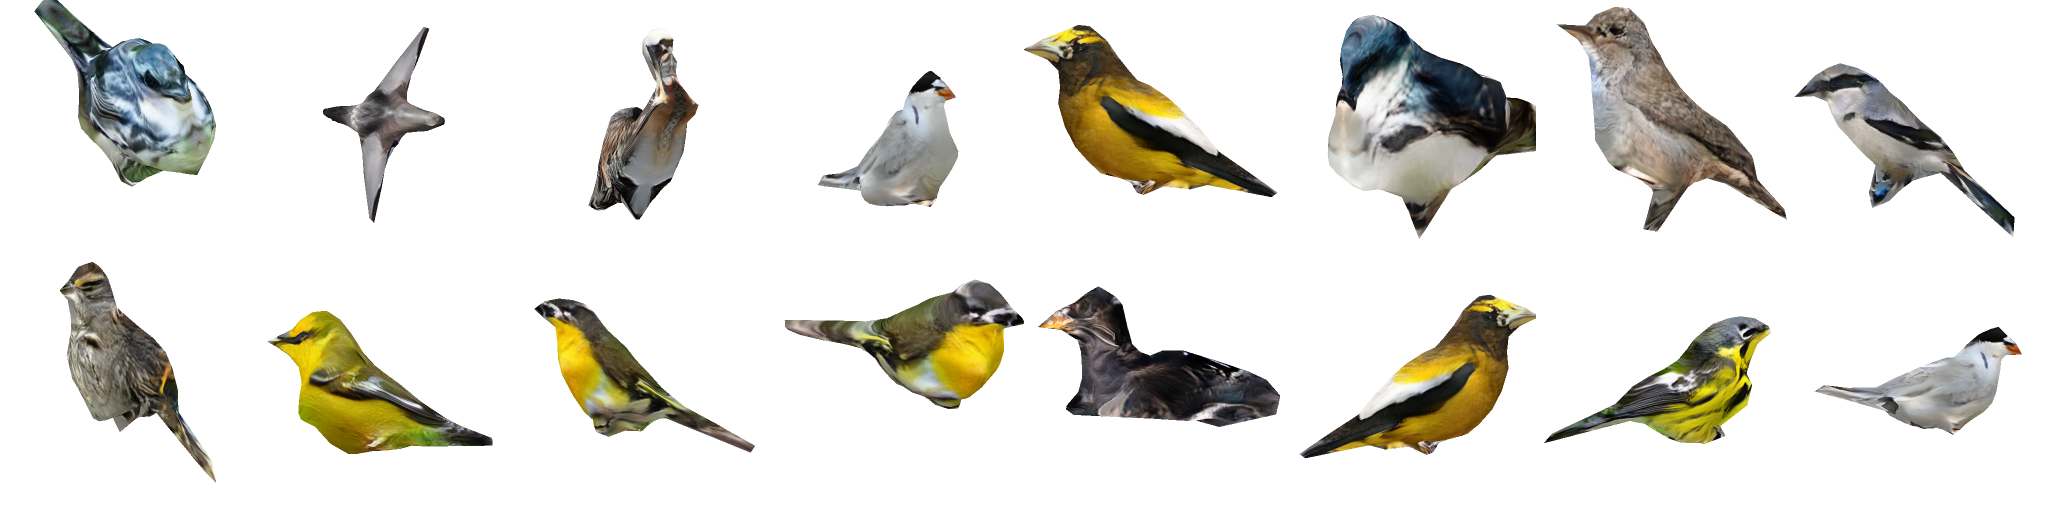

In [16]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/2dimageto3dmodel/code/results/pretrained_weights_cub.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

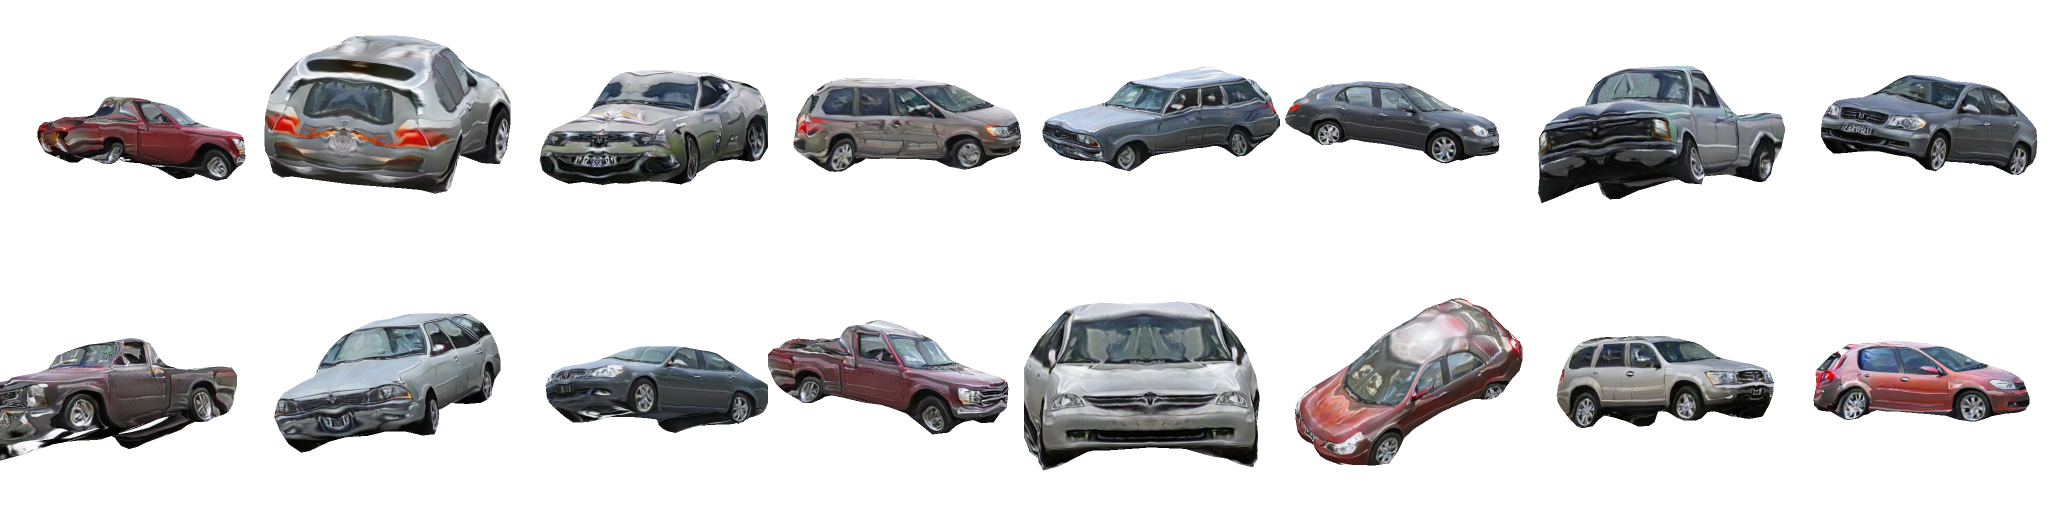

In [17]:
img = cv2.imread('/content/2dimageto3dmodel/code/results/pretrained_weights_p3d.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

**Using another dataset**

In [19]:
!cd 2dimageto3dmodel/code/ && python main.py --dataset p3d --batch_size 16 --weights pretrained_weights_p3d --save_results


Pascal 3D+ dataset with 4722 images is successfully loaded.


Export of batch with size '16' successfully done.



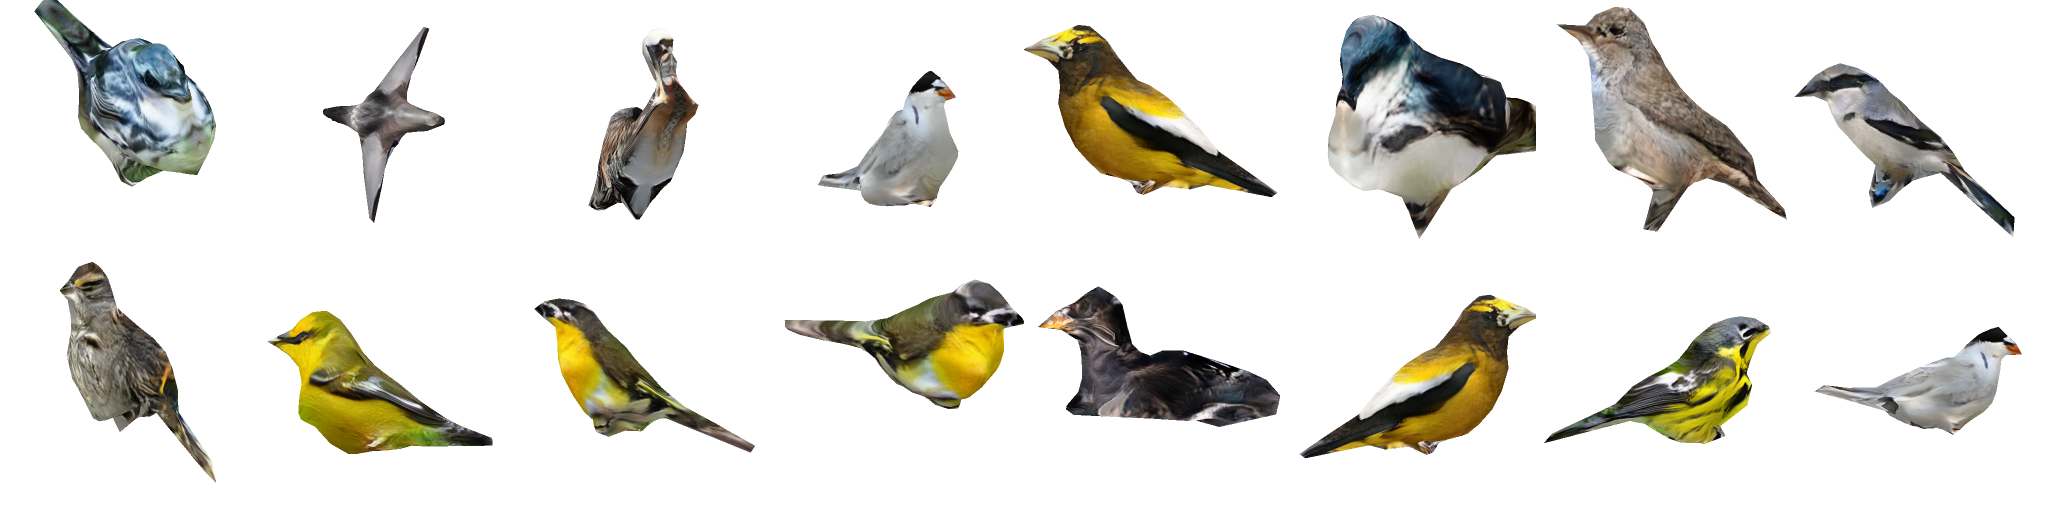

In [20]:
img = cv2.imread('/content/2dimageto3dmodel/code/results/pretrained_weights_cub.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

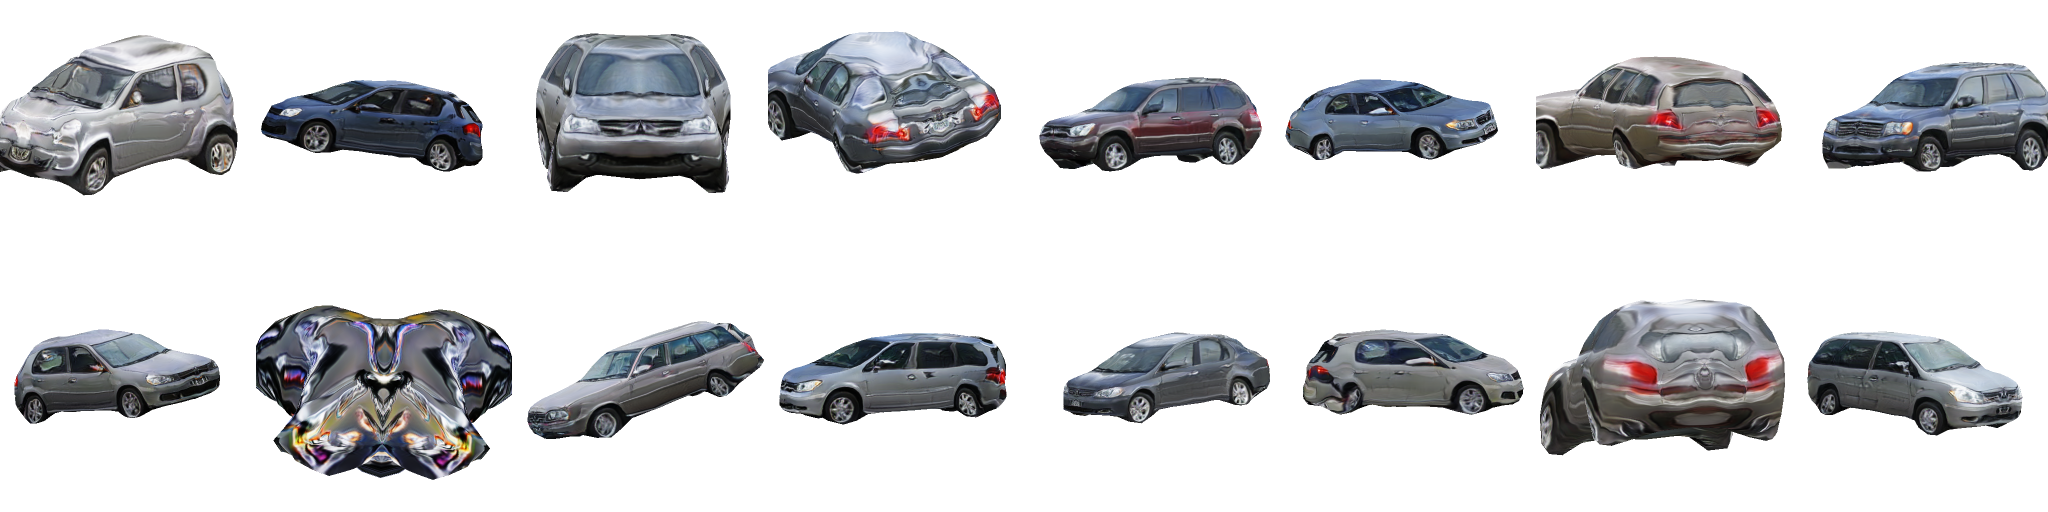

In [21]:
img = cv2.imread('/content/2dimageto3dmodel/code/results/pretrained_weights_p3d.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)